# ECBM E4040 - Assignment 2 - Task 4: Data Augmentation

One important factor in neural network training is the size of the traininig set. Since it is often not possible to get a clean and large enough dataset for training, one way to improve the network's robustness and generalization ability is to create 'fake' data by injecting random noise or doing random transformations on the available data. A technique which implements this strategy is called __data augmentation__, and has shown to be very effective.

One thing to remember, when you augment your data, is to never change the correct label of a sample. For example, for hand-written digit dataset, flipping a letter 'b' ends up looking like a letter 'd', but you must keep the label for 'b'. So please choose the best augmentation methods for your dataset.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import numpy as np
from ecbm4040.cifar_utils import load_data
import matplotlib.pyplot as plt

## Load Data

In [2]:
X_train, y_train, X_test, y_test = load_data()

num_train = 49000
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(49000, 3072) (1000, 3072) (10000, 3072) (128, 3072)


## Part 1: Visualization

### Visualize some original images

<span style="color:red">__TODO:__</span> Use Pyplot to draw any 16 samples from the __development set__ in a 4-by-4 grid.

__Hint__: The original data is vectorized, you need to find a way to reshape it into 32*32 RGB image.

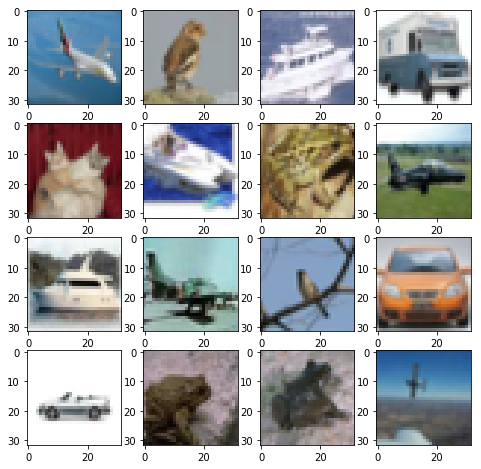

In [3]:
# YOUR CODE HERE
X_dev_trans = X_dev.reshape([128,3,32,32]).transpose((0,2,3,1))
num_show = 16
mask = np.random.choice(num_dev, num_show, replace=False)
X_show = X_dev_trans[mask,:,:,:]
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))
for i in range(r):
    for j in range(r):
        img = X_show[r*i+j]
        axarr[i][j].imshow(img)

## Part 2: Automatic batch generator

We want you to create an automatic image generator that does several kinds of data augmentations, and produces a batch of data consisting of random samples every time you call it. 

<span style="color:red">__TODO__:</span> Finish the functions of class __ImageGenerator__ in __ecbm4040/image_generator.py__. The code is fully commented with instructions.

__Hint__: The python keywords __yield__ and __next__ can help you do some tricks.

In [19]:
from ecbm4040.image_generator import ImageGenerator

<span style="color:red">__TODO__:</span> Create an ImageGenerator object using the __development set__, and use __show__ function to plot the top 16 original images.

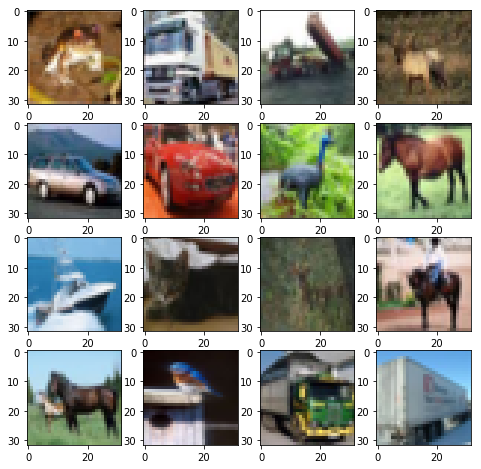

In [45]:
im_gen = ImageGenerator(X_train,y_train)
im_gen.show()

In [46]:
gen=im_gen.next_batch_gen(X_train.shape[0])

[ 9420 15722 13612  9441  4970  3081  8522  5955   685 11777]


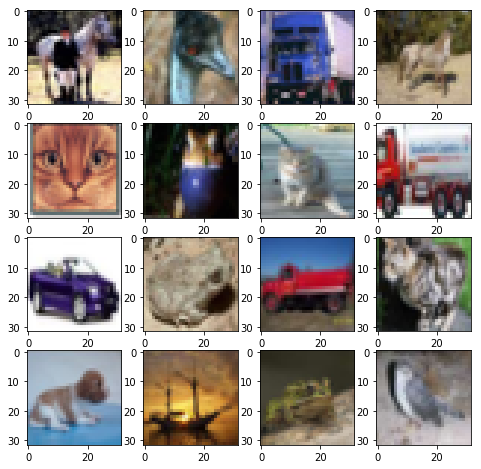

In [52]:
next(gen)
im_gen.show()

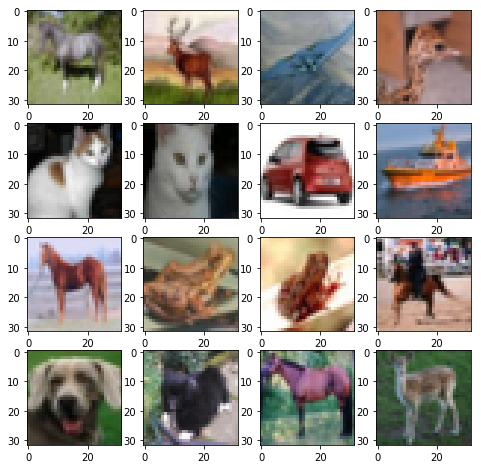

In [68]:
# YOUR CODE HERE
im_gen = ImageGenerator(X_dev_trans,y_dev)
im_gen.show()

### Translation

<span style="color:red">__TODO:__</span> Translate the original __development set__ by several pixels in both directions, and plot the top 16 images like you just did.

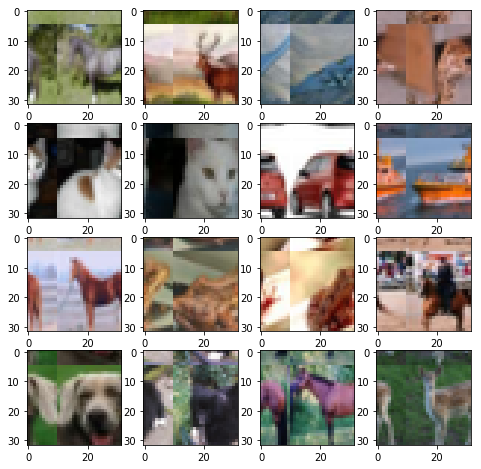

In [69]:
# YOUR CODE HERE
im_gen = ImageGenerator(X_dev_trans,y_dev)
im_gen.translate(shift_height=5, shift_width=10)
im_gen.show()

### Rotation

<span style="color:red">__TODO:__</span> Rotate the original __development set__ by several degrees, and plot the top 16 images like you just did. 

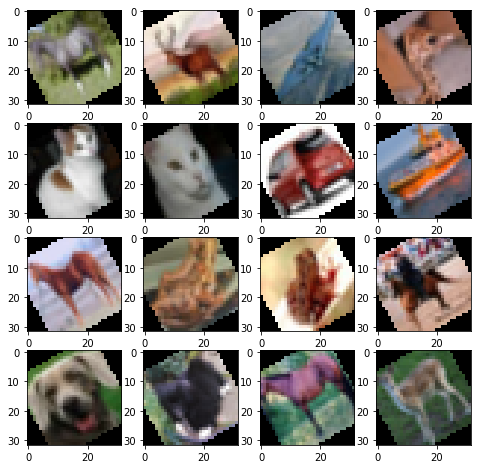

In [70]:
# YOUR CODE HERE
im_gen = ImageGenerator(X_dev_trans,y_dev)
im_gen.rotate(angle=30)
im_gen.show()

### Flipping (horizontal and vertical)

<span style="color:red">__TODO:__</span> Flip the original __development set__ as you like (horizontal, vertical, or both), and plot the top 16 images like you just did. 

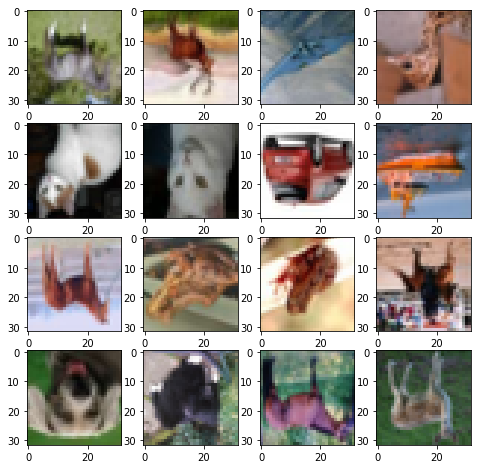

In [72]:
# YOUR CODE HERE
im_gen = ImageGenerator(X_dev_trans,y_dev)
im_gen.flip(mode='hv')
im_gen.show()

### Add Noise

<span style="color:red">__TODO:__</span> Inject random noise into the original __development set__, and plot the top 16 images like you just did.

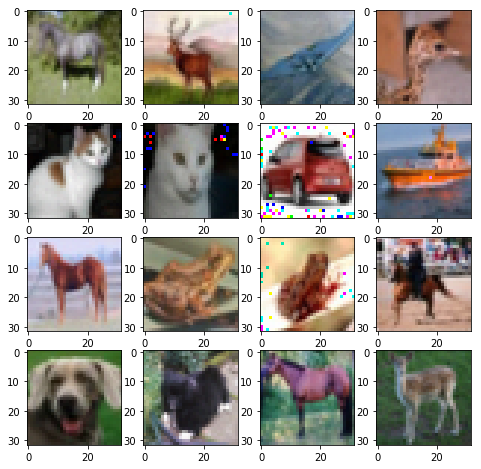

In [94]:
# YOUR CODE HERE
im_gen = ImageGenerator(X_dev_trans,y_dev)
im_gen.add_noise(portion=1, amplitude=1)
im_gen.show()

## Part 3: Data Augmentation + LeNet

<span style="color:red">__TODO__:</span> Now that you have your own data generator. At the end of __ecbm4040/neuralnets/cnn.py__, there is a not-implemented function __my_training_task4()__. Copy the __my_training()__ function above and modify it so that it uses your data generator for training. Train the network again - whether you see and improvement or a drop, record it and analyze why.

In [3]:
# YOUR CODE HERE
from ecbm4040.neuralnets.cnn import my_training_task4
import tensorflow as tf
X_train = X_train.reshape([X_train.shape[0],3,32,32]).transpose((0,2,3,1))
X_val = X_val.reshape([X_val.shape[0],3,32,32]).transpose((0,2,3,1))
X_test = X_test.reshape([X_test.shape[0],3,32,32]).transpose((0,2,3,1))

In [14]:
tf.reset_default_graph()
my_training_task4(X_train, y_train, X_val, y_val,
                  conv_featmap=[32,32],
                  fc_units=[400],
                  conv_kernel_size=[4,4],
                  pooling_size=[2,2],
                  l2_norm=0.01,
                  seed=235,
                  learning_rate=1e-2,
                  epoch=50,
                  batch_size=245,
                  verbose=False,
                  pre_trained_model=None)

Building my LeNet. Parameters: 
conv_featmap=[32, 32]
fc_units=[400]
conv_kernel_size=[4, 4]
pooling_size=[2, 2]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 200
Generating data
Data generation finished
epoch 1 
Best validation accuracy! iteration:100 accuracy: 20.799999999999997%
Best validation accuracy! iteration:200 accuracy: 26.700000000000003%
epoch 2 
Best validation accuracy! iteration:300 accuracy: 36.1%
Best validation accuracy! iteration:400 accuracy: 41.6%
epoch 3 
Best validation accuracy! iteration:500 accuracy: 47.9%
epoch 4 
Best validation accuracy! iteration:800 accuracy: 49.8%
epoch 5 
Best validation accuracy! iteration:900 accuracy: 53.1%
Best validation accuracy! iteration:1000 accuracy: 58.0%
epoch 6 
Best validation accuracy! iteration:1100 accuracy: 59.1%
epoch 7 
Best validation accuracy! iteration:1400 accuracy: 60.2%
epoch 8 
epoch 9 
Best validation accuracy! iteration:1700 accuracy: 63.8%
Best validation accuracy! iteration:1800

The model has a slight improvement of valid accuracy from 68% to 74%. Because of the way I feed the new generated data to the model, it will take more epoches to see through the whole data. I implemented three techniques (add noise, translate, flip) in the model. And the improvement ,I believe, is resulting from more training data is fed to the model, which makes the model more generalized. By creating 4 ImageGenerator, the data size is increased at least 3 times. And in every epoch, I keep the translating data set changing, this might also contribute to the increase. In all, data augumentation could improve the model by giving it more 'fake' training data.